## 1. 데이터를 준비하자

In [1]:
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
image_dir_path = "/aiffel/rock_scissor_paper/rock"

print(image_dir_path)

/aiffel/rock_scissor_paper/rock


In [3]:
from PIL import Image
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock2"
image1 = Image.open(image_dir_path + '/1.jpg')
image1.show()
imag1_size = image1.size

print(imag1_size)

(224, 224)


###  데이터 불러오기 + Resize하기

In [5]:
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [6]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [7]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [8]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


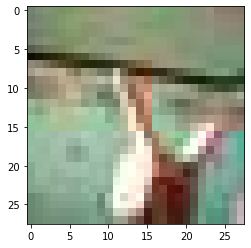

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 2. 딥러닝 네트워크 설계하기

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

## 3. 딥러닝 네트워크 학습시키기

In [11]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
10/10 [==============================] - 6s 232ms/step - loss: 22.5342 - accuracy: 0.4005
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 6.2712 - accuracy: 0.4842
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0658 - accuracy: 0.7265
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8469
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.9345
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.9717
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9776
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9886
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9983
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 1.0000


## 4. 얼마나 잘 만들었는지 확인하기

test 디렉토리를 만들어 다른 작업자의 이미지파일을 다운로드받고 압축해제함.

In [ ]:
# test 디렉토리를 생성해서, 친구에게 받은 데이터를 업로드해보세요.
!mkdir -p ~/aiffel/rock_scissor_paper/test
# 원하는 디렉토리로 이동 =3
#!cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
!unzip ~/aiffel/rock_scissor_paper/test/rock/rock-test.zip
!unzip ~/aiffel/rock_scissor_paper/test/paper/paper-test.zip
!unzip ~/aiffel/rock_scissor_paper/test/scissor/scissor-test.zip

#### resize작업함.

In [ ]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

resize_images(test_image_dir_path)

print("바위 이미지 resize 완료!")

In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

resize_images(test_image_dir_path)

print("가위 이미지 resize 완료!")

In [ ]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

resize_images(test_image_dir_path)

print("보 이미지 resize 완료!")

### 테스트 데이타셋 변수에 할당

In [12]:
# 테스트 데이타셋
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [14]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.1506 - accuracy: 0.2867
test_loss: 2.1505837440490723 
test_accuracy: 0.2866666615009308


## 5. 소감 및 대책

- 테스트 정확도가 낮은 것은 train dataset을 만들면서 벽지를 배경으로 촬영하여 명확한 구분을 하지 못한 것으로 추측됨.   
  
- 또한 단순한 손모양으로 train dataset을 찍다보니 학습과정에서 조기에 정확도가 100%되었다. 전형적인 과적합으로 보임.  
  
- 큰 줄기를 제시하고 세부적인 것은 스스로 만들어 봄으로써 습득이 확실해졌다.
   (github사용, ubunta 사용, 클라우드 사용 등)    
   
- 트레이닝 이미지를 다시 확보하여 재가동을 해봐야겠다.